# TDI Challenge for the 2020 Jan Session

## Section 1

> Arrest incidents data of the city of Los Angeles

In [1]:
# basic modules 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.spatial import cKDTree


# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'

pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None
pd.set_option("display.precision", 10)

## 1. Read and Explore the Data

In [2]:
# Read data
#rawdf = pd.read_csv("./Arrest_Data_from_2010_to_Present.csv", low_memory=False)

In [3]:
#rawdf.head(5).transpose()

In [4]:
#rawdf.info()

In [5]:
#rawdf['arrestdt'] = pd.to_datetime(rawdf['Arrest Date'])

In [6]:
import pyarrow as pa
import pyarrow.parquet as pq

#### Write a parquet table for the future use

In [7]:
#pq.write_table(pa.Table.from_pandas(rawdf),\
#               'arrest-data-LA.parquet.snappy', compression='snappy')

#### Read data from the premade parquet table

In [8]:
rawdf = pq.read_table('arrest-data-LA.parquet.snappy').to_pandas()

In [9]:
rawdf.head(5).transpose()

,0,1,2,3,4
Report ID,191811472,5614161,5615197,5615701,5615929
Arrest Date,05/03/2019,04/29/2019,04/30/2019,04/30/2019,04/30/2019
Time,1700,1040,615,1100,1550
Area ID,18,8,6,9,20
Area Name,Southeast,West LA,Hollywood,Van Nuys,Olympic
Reporting District,1802,842,663,901,2049
Age,23,41,27,2,41
Sex Code,F,M,M,F,M
Descent Code,B,H,O,H,W
Charge Group Code,NaN,3,5,NaN,4


### Q1 : How many bookings of arrestees were made in 2018?

In [10]:
df = rawdf[rawdf.arrestdt < '2019-01-01']

In [11]:
len(df[df.arrestdt > '2017-12-31'].index)

104277

> The answer is `104277`.

### Q2 : How many bookings of arrestees were made in the area with the most arrests in 2018?

In [12]:
df18 = df[df.arrestdt > '2017-12-31']

In [13]:
df18.groupby(['Area ID','Area Name'])['Area Name'].count()

Area ID  Area Name  
1        Central        10951
2        Rampart         7345
3        Southwest       5927
4        Hollenbeck      3590
5        Harbor          3875
6        Hollywood       9715
7        Wilshire        2467
8        West LA         2687
9        Van Nuys        6193
10       West Valley     3562
11       Northeast       3452
12       77th Street     6259
13       Newton          5427
14       Pacific         6778
15       N Hollywood     4947
16       Foothill        3006
17       Devonshire      3146
18       Southeast       3601
19       Mission         4357
20       Olympic         3898
21       Topanga         3094
Name: Area Name, dtype: int64

> The answer is `10951`.

### Q3 : What is the 95% quantile of the age of the arrestee in 2018?

> Only consider the following charge groups for your analysis:

- Vehicle Theft,Robbery,Burglary,Receive Stolen Property

In [14]:
grouped = df18.groupby('Charge Group Description')

In [15]:
len(grouped.groups.keys())

27

In [16]:
grouped.groups.keys()

['Homicide',
 'Pre-Delinquency',
 'Gambling',
 'Forgery/Counterfeit',
 'Moving Traffic Violations',
 'Disorderly Conduct',
 'Liquor Laws',
 'Vehicle Theft',
 'Aggravated Assault',
 'Prostitution/Allied',
 'Burglary',
 'Miscellaneous Other Violations',
 'Sex (except rape/prst)',
 'Receive Stolen Property',
 'Larceny',
 'Robbery',
 'Non-Criminal Detention',
 'Disturbing the Peace',
 'Fraud/Embezzlement',
 'Narcotic Drug Laws',
 'Against Family/Child',
 'Drunkeness',
 'Weapon (carry/poss)',
 'Federal Offenses',
 'Driving Under Influence',
 'Other Assaults',
 'Rape']

#### a quick and dirty check for each group

In [17]:
grouped.get_group('Vehicle Theft')['Age'].count()

3257

In [18]:
grouped.get_group('Robbery')['Age'].count()

2787

In [19]:
grouped.get_group('Burglary')['Age'].count()

1958

In [20]:
grouped.get_group('Receive Stolen Property')['Age'].count()

455

#### merge the groups and get the answer

In [21]:
trimdf18 = pd.concat([\
                      grouped.get_group('Vehicle Theft')[['Charge Group Description','Age']],\
                      grouped.get_group('Robbery')[['Charge Group Description','Age']],\
                      grouped.get_group('Burglary')[['Charge Group Description','Age']],\
                      grouped.get_group('Receive Stolen Property')\
                          [['Charge Group Description','Age']]
                     ])

In [22]:
len(trimdf18.index)

8457

In [23]:
trimdf18['Charge Group Description'].unique()

array(['Vehicle Theft', 'Robbery', 'Burglary', 'Receive Stolen Property'],
      dtype=object)

In [24]:
trimdf18.head(3)

,Charge Group Description,Age
167,Vehicle Theft,43
172,Vehicle Theft,32
173,Vehicle Theft,26


In [25]:
trimdf18['Age'].quantile([0.05,0.5,0.95])

0.05    16.0
0.50    27.0
0.95    52.0
Name: Age, dtype: float64

> The answer is `52`.

### Q4 : Report the largest absolute value among the calculated Z-scores.

> There are differences between the average age of an arrestee for the various charge groups. Are these differences statistically significant? For this question, calculate the Z-score of the average age for each charge group. Report the largest absolute value among the calculated Z-scores.

- Only consider data for 2018
- Do not consider "Pre-Delinquency" and "Non-Criminal Detention" as these charge groups are reserved for minors
- Exclude any arrests where the charge group description is not known

In [26]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104277 entries, 156 to 1290614
Data columns (total 18 columns):
Report ID                   104277 non-null int64
Arrest Date                 104277 non-null object
Time                        104270 non-null float64
Area ID                     104277 non-null int64
Area Name                   104277 non-null object
Reporting District          104277 non-null int64
Age                         104277 non-null int64
Sex Code                    104277 non-null object
Descent Code                104277 non-null object
Charge Group Code           91890 non-null float64
Charge Group Description    91814 non-null object
Arrest Type Code            104277 non-null object
Charge                      104277 non-null object
Charge Description          91890 non-null object
Address                     104277 non-null object
Cross Street                56333 non-null object
Location                    104277 non-null object
arrestdt                 

In [27]:
df18['Charge Group Description'].isna().sum()

12463

In [28]:
df18['Charge Group Code'].isna().sum()

12387

> Some discrepancy between the `Code` and `Decription`. I just decide to keep using `Charge Group Description`

#### trim the data following the instructions

In [29]:
df18.dropna(subset=['Charge Group Description'])['Age'].count()

91814

In [30]:
trimdf18 = df18.dropna(subset=['Charge Group Description'])

In [31]:
trimdf18 = trimdf18[(trimdf18['Charge Group Description'] != 'Pre-Delinquency') & \
                   (trimdf18['Charge Group Description'] != 'Non-Criminal Detention')]

In [32]:
len(trimdf18.index)

91544

In [33]:
grouped = trimdf18.groupby('Charge Group Description')

In [34]:
grouped.groups.keys()

['Homicide',
 'Gambling',
 'Forgery/Counterfeit',
 'Moving Traffic Violations',
 'Disorderly Conduct',
 'Liquor Laws',
 'Vehicle Theft',
 'Federal Offenses',
 'Aggravated Assault',
 'Prostitution/Allied',
 'Burglary',
 'Miscellaneous Other Violations',
 'Sex (except rape/prst)',
 'Receive Stolen Property',
 'Larceny',
 'Robbery',
 'Disturbing the Peace',
 'Fraud/Embezzlement',
 'Narcotic Drug Laws',
 'Drunkeness',
 'Weapon (carry/poss)',
 'Against Family/Child',
 'Driving Under Influence',
 'Other Assaults',
 'Rape']

In [35]:
mean_age_grouped_df = pd.DataFrame(grouped['Age'].agg('mean'))

In [36]:
mean_age_grouped_df.reset_index(level=0, inplace=True)

In [37]:
mean_age_grouped_df.head(3)

,Charge Group Description,Age
0,Against Family/Child,35.5395449621
1,Aggravated Assault,34.4346224678
2,Burglary,30.3912155260


In [38]:
from scipy import stats

In [39]:
mean_age_grouped_df['z_abs'] = \
    np.abs(stats.zscore(mean_age_grouped_df.Age))

In [40]:
mean_age_grouped_df.sort_values(by=['z_abs'],ascending=False).head(10)

,Charge Group Description,Age,z_abs
6,Drunkeness,43.9050145927,2.1717481577
21,Robbery,27.1829924650,1.8601312110
13,Liquor Laws,42.4834817581,1.8289996034
10,Gambling,41.3085714286,1.5457146824
3,Disorderly Conduct,41.2298895899,1.5267435509
23,Vehicle Theft,29.8216149831,1.2239277895
18,Prostitution/Allied,30.0060606061,1.1794557456
24,Weapon (carry/poss),30.1743227326,1.1388857361
2,Burglary,30.3912155260,1.0865902916
11,Homicide,30.4708029197,1.0674008199


> The answer is `2.1717481577`.

### Q5 : What is the projected number of felony arrests in 2019?

>Felony arrest incidents have been dropping over the years. Using a trend line (linear estimation) for the data from 2010 and 2018 (inclusive), what is the projected number of felony arrests in 2019? Round to the nearest integer. Note, the data set includes arrests for misdemeanor, felonies, etc.

In [41]:
df.head(5).transpose()

,151,152,153,154,155
Report ID,4738682,4738771,4988057,5060090,5165092
Arrest Date,08/01/2016,08/01/2016,05/14/2017,08/01/2017,11/27/2017
Time,1835,1835,2215,2305,2215
Area ID,6,6,7,18,7
Area Name,Hollywood,Hollywood,Wilshire,Southeast,Wilshire
Reporting District,645,645,755,1835,713
Age,32,44,48,43,26
Sex Code,F,M,M,M,M
Descent Code,O,O,W,B,B
Charge Group Code,10,10,11,8,11


In [42]:
df['Arrest Type Code'].unique()

array(['F', 'M', 'O', 'D', 'I'], dtype=object)

In [43]:
felonydf = df[df['Arrest Type Code'] == 'F']

In [44]:
len(felonydf.index)

388868

In [45]:
yrfelony = pd.DataFrame(felonydf['arrestdt'].groupby(felonydf.arrestdt.dt.year).count())

In [46]:
yrfelony.columns = ['felony_count']

In [47]:
yrfelony

,felony_count
arrestdt,
2010,51157
2011,49830
2012,50610
2013,47882
2014,45878
2015,35709
2016,36880
2017,35974
2018,34948


In [48]:
yrfelony.index.values

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [49]:
yrfelony.felony_count.values

array([51157, 49830, 50610, 47882, 45878, 35709, 36880, 35974, 34948])

#### Linear regression

In [50]:
slope, intercept, r_value, p_value, std_err =\
stats.linregress(np.double(yrfelony.index.values),np.double(yrfelony.felony_count.values))

In [51]:
[slope, intercept, r_value, p_value, std_err]

[-2433.95,
 4945182.855555556,
 -0.933790185527212,
 0.0002303949165346636,
 352.5162882836633]

In [52]:
# model prediction
ymodel = -2433.95 * np.double(yrfelony.index.values) + 4945182.855555556

In [53]:
-2433.95 * np.double(2019) + 4945182.855555556

31037.80555555597

> The answer is `31038`

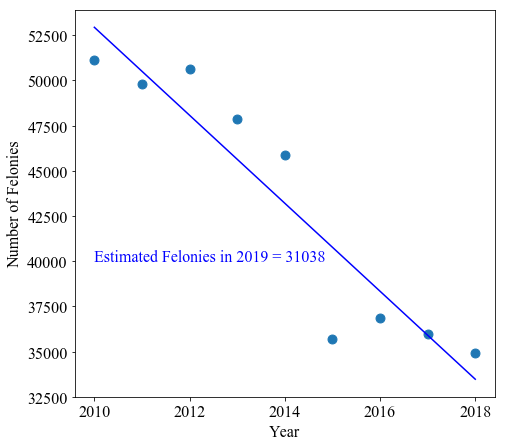

In [54]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'


fig = plt.figure(figsize=(7,6.2))

#plt.axis([0,lenmax,0,1.0])
#plt.title("Number of Felonies in Los Angeles")
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'Number of Felonies')
plt.xlabel(r'Year')
plt.scatter(yrfelony.index.values,yrfelony.felony_count.values,s=80)
plt.plot(yrfelony.index.values,ymodel,color='b')
plt.text(2010,40000,'Estimated Felonies in 2019 = 31038',color='b')


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#fig.savefig("car-accidents.eps")
plt.show()

### Q6 : How many arrest incidents occurred within 2 km from the Bradbury Building in 2018? 

>Use (34.050536, -118.247861) for the coordinates of the Bradbury Building . For simplicity, please use the spherical Earth projected to a plane equation for calculating distances. Use the radius of the Earth as 6371 km. Note, some arrest records are missing location data and the location is listed as (0, 0). These records should not factor in your calculation.

>$D = R \sqrt{(\Delta_\phi)^2 + (\cos(\phi_m)\Delta_\lambda)^2}$, where $\phi$ latitude, $\lambda$ longitude, and $R = 6371$ km.

#### Prepare the trigonometry

In [55]:
lat0 = 34.050536
lon0 = -118.247861

In [56]:
degtorad = np.pi/180.0

In [57]:
lat0*degtorad

0.5942939652688599

In [58]:
cosfactor = np.cos(lat0*degtorad)

In [59]:
cosfactor * cosfactor

0.6864852113797761

In [60]:
degtorad

0.017453292519943295

In [61]:
def toDistance (inlat,inlon): # inputs should be in the degree unit
    dlat = np.abs(inlat - 34.050536)*0.017453292519943295
    dlon = np.abs(inlon + 118.247861)*0.017453292519943295
    reval = 6371.0*np.sqrt(dlat*dlat + 0.6864852113797761*dlon*dlon)
    return reval

#### Parsing `Locations` to `lat` and `lon` columns

In [62]:
geodf18 = df18[df18.Location != '(0.0, 0.0)'].reset_index(drop=True)

In [63]:
len(geodf18.index)

104260

In [64]:
len(df18.index)

104277

In [65]:
codf = pd.DataFrame(geodf18['Location'].str.split().tolist(),\
                   columns=['lat','lon'])

In [66]:
codf['lat'].str.replace("(","").str.replace(",","").astype(np.float).tail(3)

104257    34.1119
104258    34.0872
104259    34.3009
Name: lat, dtype: float64

In [67]:
codf['lon'].str.replace(")","").astype(np.float).tail(3)

104257   -118.2529
104258   -118.1760
104259   -118.4696
Name: lon, dtype: float64

In [68]:
geodf18['Location'].tail(3)

104257    (34.1119, -118.2529)
104258     (34.0872, -118.176)
104259    (34.3009, -118.4696)
Name: Location, dtype: object

In [69]:
geodf18['lat'] = codf['lat'].str.replace("(","").str.replace(",","").astype(np.float)

In [70]:
geodf18['lon'] = codf['lon'].str.replace(")","").astype(np.float)

In [71]:
geodf18[['Location','lat','lon']].tail(3)

,Location,lat,lon
104257,"(34.1119, -118.2529)",34.1119,-118.2529
104258,"(34.0872, -118.176)",34.0872,-118.1760
104259,"(34.3009, -118.4696)",34.3009,-118.4696


In [72]:
geodf18[['lat','lon']].isna().sum()

lat    0
lon    0
dtype: int64

In [73]:
len(geodf18.index)

104260

#### Calculate distances from Bradbury Building

In [74]:
geodf18[['lat','lon']].apply(lambda row: toDistance(row[0],row[1]), axis=1).head(5)

0     7.6200567575
1     9.8726125699
2     6.2392424324
3     5.8717801765
4    12.6102901477
dtype: float64

In [75]:
geodf18[['lat','lon']].apply(lambda row: toDistance(row[0],row[1]), axis=1).tail(5)

104255    28.6012765780
104256     0.5827939278
104257     6.8391401200
104258     7.7751105884
104259    34.5305212473
dtype: float64

In [76]:
geodf18['distBB'] = geodf18[['lat','lon']]\
                    .apply(lambda row: toDistance(row[0],row[1]), axis=1)

In [77]:
geodf18['distBB'].describe()

count    104260.0000000000
mean         14.0280005538
std          11.0238523893
min           0.0531599652
25%           4.9010669618
50%           9.8653530856
75%          22.7372412731
max          42.0641509512
Name: distBB, dtype: float64

In [78]:
geodf18[geodf18.distBB <= 2.0][['lat','lon','distBB']].head(5)

,lat,lon,distBB
9,34.0416,-118.2440,1.0553901227
10,34.0460,-118.2509,0.5768792857
11,34.0413,-118.2517,1.0861932331
14,34.0350,-118.2386,1.9267371936
15,34.0444,-118.2407,0.9490954583


In [79]:
geodf18[geodf18.distBB <= 2.0][['lat','lon','distBB']].tail(5)

,lat,lon,distBB
104187,34.0652,-118.2492,1.6352222844
104189,34.0566,-118.2681,1.9827904173
104216,34.0396,-118.2590,1.5911886846
104240,34.0450,-118.2640,1.6092724315
104256,34.0454,-118.2466,0.5827939278


In [80]:
len(geodf18[geodf18.distBB <= 2.0].index)

11461

> The answer is `11461`

### Q7 : How many arrest incidents were made per kilometer on Pico Boulevard during 2018?

>For this question, we will need to estimate the length of Pico Boulevard, which mostly stretches from east to west. To estimate the length of Pico Boulevard:

- Consider all location data which the listed address mentions "Pico".

- Remove outliers by filtering out locations where either the latitude or longitude is 2 standard deviations beyond the mean of the subset of identified points.

- To estimate the length, calculate the distance from the most western and eastern coordinate points. Use the spherical Earth projected to a plane equation for calculating distances.

>Once you have estimated the length of Pico Boulevard, you can proceed to report the number of arrest incidents per kilometer on Pico Boulevard in 2018.

In [81]:
geodf18.head(3).transpose()

,0,1,2
Report ID,5213460,5257944,5328813
Arrest Date,01/24/2018,03/15/2018,06/01/2018
Time,1930,310,1800
Area ID,6,7,3
Area Name,Hollywood,Wilshire,Southwest
Reporting District,668,743,356
Age,29,33,44
Sex Code,M,F,F
Descent Code,H,O,B
Charge Group Code,10,1,16


#### Select `PICO`-related arrests

In [82]:
picodf = geodf18[geodf18.Address.str.contains("PICO")]

In [83]:
len(picodf.index)

613

In [84]:
picodf.Address.unique()

array(['PICO                         BL',
       '2500 W  PICO                         BL', 'PICO',
       '4500 W  PICO                         BL',
       '10500 W  PICO                         BL',
       '300 W  PICO                         BL',
       '400 W  PICO                         BL',
       '100 W  PICO                         BL',
       '1800 W  PICO                         BL',
       '1400 W  PICO                         BL',
       '1600 W  PICO                         BL', 'TAMPICO',
       '11200 W  PICO                         BL',
       '11300 W  PICO                         BL',
       '8900 W  PICO                         BL',
       '4900 W  PICO                         BL',
       '8600 W  PICO                         BL',
       '10700 W  PICO                         BL',
       '9500 W  PICO                         BL',
       '11800 W  PICO                         BL',
       '10600 W  PICO                         BL',
       '4400 W  PICO                

> TIPICO? TAMPICO? I will remove these from our `picodf`

In [85]:
picodf[(picodf.Address != '3900    TAMPICO                      AV') &\
       (picodf.Address != '20000    TIPICO                       ST') &\
       (picodf.Address != 'TAMPICO')]['Address'].count()

610

In [86]:
picodf = picodf[(picodf.Address != '3900    TAMPICO                      AV') &\
                (picodf.Address != '20000    TIPICO                       ST') &\
                (picodf.Address != 'TAMPICO')]

In [87]:
len(picodf.index)

610

#### Measure `mean` and `std` of longitudes and latitudes 

In [88]:
picodf[['lat','lon']].describe()

,lat,lon
count,610.0000000000,610.0000000000
mean,34.0428339344,-118.3500693443
std,0.0085109808,0.0678321206
min,33.9786000000,-118.4530000000
25%,34.0362000000,-118.4295000000
50%,34.0470500000,-118.3335000000
75%,34.0479000000,-118.2916000000
max,34.0814000000,-118.2089000000


#### a quick-and-dirty 2$\sigma$ filtering

In [89]:
picodf[(picodf.lat > 34.0428339344 - 2.0*0.0085109808) & \
       (picodf.lat < 34.0428339344 + 2.0*0.0085109808) & \
       (picodf.lon > -118.3500693443 - 2.0*0.0678321206) & \
       (picodf.lon < -118.3500693443 + 2.0*0.0678321206)].lat.count()

599

In [90]:
picotrimdf = \
picodf[(picodf.lat > 34.0428339344 - 2.0*0.0085109808) & \
       (picodf.lat < 34.0428339344 + 2.0*0.0085109808) & \
       (picodf.lon > -118.3500693443 - 2.0*0.0678321206) & \
       (picodf.lon < -118.3500693443 + 2.0*0.0678321206)]

In [91]:
len(picotrimdf.index)

599

#### Estimate the length of PICO Blvd

In [92]:
picotrimdf[['lat','lon']].describe()

,lat,lon
count,599.0000000000,599.0000000000
mean,34.0431479132,-118.3511015025
std,0.0073565700,0.0670090508
min,34.0281000000,-118.4530000000
25%,34.0363500000,-118.4298000000
50%,34.0472000000,-118.3335000000
75%,34.0479000000,-118.2936000000
max,34.0583000000,-118.2484000000


In [93]:
picotrimdf[picotrimdf.lon == -118.4530000000][['lat','lon','Address']]

,lat,lon,Address
15843,34.0281,-118.453,PICO BL
16126,34.0281,-118.453,PICO
16425,34.0281,-118.453,PICO
16561,34.0281,-118.453,PICO BL
17265,34.0281,-118.453,PICO
37644,34.0281,-118.453,W PICO
37923,34.0281,-118.453,W PICO BL
41448,34.0281,-118.453,PICO
43232,34.0281,-118.453,PICO
53299,34.0281,-118.453,PICO


In [94]:
picotrimdf[picotrimdf.lon == -118.2484000000][['lat','lon','Address']]

,lat,lon,Address
21379,34.0303,-118.2484,PICO


> Mean Latitude = 34.0431479132, west-most point = (34.0281, -118.453), east-most point = (34.0303,-118.2484)

In [95]:
cosfactor = np.cos(34.0431479132*degtorad)

In [96]:
dlat = np.abs(34.0281 - 34.0303)*degtorad
dlon = np.abs(-118.453 + 118.2484)*degtorad

In [97]:
6371.0*np.sqrt(dlat*dlat + cosfactor*cosfactor*dlon*dlon)

18.85300565830783

In [98]:
np.double(len(picotrimdf.index))/18.85300565830783

31.772122220524697

> The answer is `31.772122220524697`. But, as we can see the below, the length of pico blvd can be misleading due to its curvy(?) shape. 

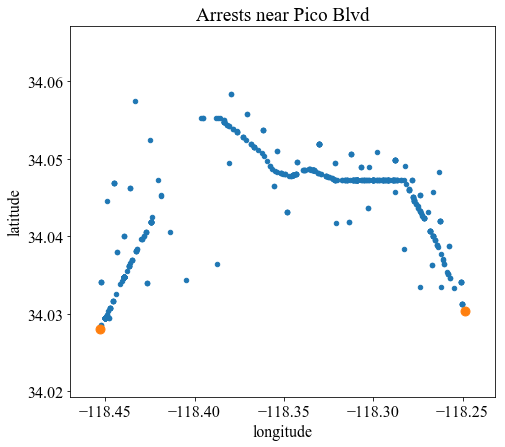

In [99]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'


fig = plt.figure(figsize=(7,6.2))

#plt.axis([0,lenmax,0,1.0])
plt.title("Arrests near Pico Blvd")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'longitude')
plt.ylabel(r'latitude')
plt.scatter(picotrimdf.lon.values,picotrimdf.lat.values,s=20)
plt.scatter([-118.453,-118.2484],[34.0281,34.0303],s=80)
#plt.plot(yrfelony.index.values,ymodel,color='b')
#plt.text(2010,40000,'Estimated Felonies in 2019 = 31038',color='b')


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#fig.savefig("car-accidents.eps")
plt.show()

### Q8 : Report the average of the top 5 of the calculated ratio.

>Some types of arrest incidents in certain areas occur at a highly disproportionate rate compared to their frequency city-wide. For example, let's say that the rate of larceny arrests (charge group code 6) is 1% in Devonshire (area ID 17). This rate may appear low but what if larceny arrests constitute 0.1 % city-wide? The ratio between these two probabilities is 10 and we can say that larceny occurs unusually often in Devonshire (Note, these numbers were made up for illustration purposes). Calculate this ratio for all charge group code and area ID pairs. You can view this ratio as the ratio of the conditional probability of an arrest incident of a charge group code given that it occurred in an area ID to the unconditional probability of the arrest incident of a charge group. Report the average of the top 5 of the calculated ratio.

- Consider all records prior to January 1, 2019.
- Some arrest incidents don't have a charge group code. These records should not be considered in your analysis.
- Arrest incidents for charge group code 99 should not be considered in your analysis.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231627 entries, 151 to 1310114
Data columns (total 18 columns):
Report ID                   1231627 non-null int64
Arrest Date                 1231627 non-null object
Time                        1231437 non-null float64
Area ID                     1231627 non-null int64
Area Name                   1231627 non-null object
Reporting District          1231627 non-null int64
Age                         1231627 non-null int64
Sex Code                    1231627 non-null object
Descent Code                1231627 non-null object
Charge Group Code           1151720 non-null float64
Charge Group Description    1151261 non-null object
Arrest Type Code            1231627 non-null object
Charge                      1231627 non-null object
Charge Description          1151728 non-null object
Address                     1231627 non-null object
Cross Street                707542 non-null object
Location                    1231627 non-null object
arre

In [101]:
df.head(3).transpose()

,151,152,153
Report ID,4738682,4738771,4988057
Arrest Date,08/01/2016,08/01/2016,05/14/2017
Time,1835,1835,2215
Area ID,6,6,7
Area Name,Hollywood,Hollywood,Wilshire
Reporting District,645,645,755
Age,32,44,48
Sex Code,F,M,M
Descent Code,O,O,W
Charge Group Code,10,10,11


In [102]:
df['Area ID'].unique()

array([ 6,  7, 18,  3, 13, 12,  1, 14,  8, 20,  9,  2, 11, 10, 19,  4, 21,
       15, 16,  5, 17])

In [103]:
df['Charge Group Code'].unique()

array([10., 11.,  8.,  1., 16., 12., 24.,  7.,  4., 22.,  3.,  5., 15.,
        6., nan, 23.,  9., 13., 14., 17., 18.,  2., 19., 26., 27., 29.,
       21., 20., 25., 99.])

> Ok. The problematic codes are `nan` and `99`. 

#### trim `df`

In [104]:
newdf = df.dropna(subset=['Charge Group Code'])

In [105]:
newdf['Charge Group Code'].unique()

array([10., 11.,  8.,  1., 16., 12., 24.,  7.,  4., 22.,  3.,  5., 15.,
        6., 23.,  9., 13., 14., 17., 18.,  2., 19., 26., 27., 29., 21.,
       20., 25., 99.])

In [106]:
newdf['Charge Group Code'] = newdf['Charge Group Code'].astype(np.int)

In [107]:
newdf['Charge Group Code'].unique()

array([10, 11,  8,  1, 16, 12, 24,  7,  4, 22,  3,  5, 15,  6, 23,  9, 13,
       14, 17, 18,  2, 19, 26, 27, 29, 21, 20, 25, 99])

In [108]:
newdf = newdf[newdf['Charge Group Code'] != 99]

In [109]:
newdf['Charge Group Code'].unique()

array([10, 11,  8,  1, 16, 12, 24,  7,  4, 22,  3,  5, 15,  6, 23,  9, 13,
       14, 17, 18,  2, 19, 26, 27, 29, 21, 20, 25])

In [110]:
len(newdf.index)

1151713

#### `crosstab` between `Area ID` and `Charge Group Code`

In [111]:
crtab = pd.crosstab(newdf['Area ID'],newdf['Charge Group Code'],\
                    margins=True,margins_name="Total")

In [112]:
crtab

Charge Group Code,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,29,Total
Area ID,,,,,,,,,,,,,,,,,,,,,
1,133,188,1530,4254,1034,4588,755,4805,696,707,...,19480,163,4612,2961,26613,15,146,80,65,116368
2,109,195,1772,4919,859,1797,912,3049,358,225,...,486,263,4561,1283,13046,5,397,721,20,56184
3,146,152,2317,5545,1567,6191,1581,3769,364,353,...,655,42,4955,3373,9837,18,503,246,24,63703
4,102,140,783,3322,720,1178,1160,2035,93,103,...,104,100,3502,1457,7428,9,410,397,14,37985
5,91,104,768,3583,1087,2344,1075,2610,249,190,...,705,119,2839,1585,9274,8,302,970,22,44126
6,73,157,1523,3750,1076,3123,940,4134,403,653,...,5529,177,9235,3076,21104,10,177,59,63,102986
7,42,124,829,2436,766,3170,491,1638,241,320,...,191,42,3309,1393,5241,3,192,467,10,29067
8,18,69,321,1373,615,1993,247,1297,177,310,...,822,45,2847,791,4398,1,64,90,21,25864
9,139,130,811,3955,1155,4797,834,2876,438,870,...,356,58,8161,5784,9572,11,248,447,10,61337


In [113]:
crtabfloat = crtab.astype(np.float)

#### Explore how `.loc`  works in crosstab-dataframe

In [114]:
crtabfloat.loc['Total',1]

2255.0

In [115]:
crtabfloat.loc[1,'Total']

116368.0

In [116]:
crtabfloat.loc['Total','Total']

1151713.0

#### a quick-and-dirty *double* `for` *loops* to get the ratios

In [117]:
iarea = range(1,22)
icharge = range(1,28)+[29]

In [118]:
ratiolist = []
tmp_cprob = 0.0 #conditional probabiltiy
tmp_ucprob = 0.0 #unconditional probability
#for ia in iarea:
for ia in range(1,3):
    for ic in icharge:
        tmp_cprob = crtabfloat.loc[ia,ic]/crtabfloat.loc[ia,'Total']
        tmp_ucprob = crtabfloat.loc['Total',ic]/crtabfloat.loc['Total','Total']
        print "iarea = ",ia,", icharge = ",ic,\
            " ucprob = ",tmp_ucprob," cprob = ",tmp_cprob
        ratiolist.append(tmp_cprob/tmp_ucprob)

iarea =  1 , icharge =  1  ucprob =  0.001957953066432349  cprob =  0.0011429258902791145
iarea =  1 , icharge =  2  ucprob =  0.002356489854677337  cprob =  0.0016155644163343874
iarea =  1 , icharge =  3  ucprob =  0.021198857701528073  cprob =  0.013147944452083046
iarea =  1 , icharge =  4  ucprob =  0.06769394805824021  cprob =  0.03655644163343875
iarea =  1 , icharge =  5  ucprob =  0.01973234651341089  cprob =  0.00888560428983913
iarea =  1 , icharge =  6  ucprob =  0.05752908927831847  cprob =  0.039426646500756224
iarea =  1 , icharge =  7  ucprob =  0.019729741697801447  cprob =  0.006488037948576928
iarea =  1 , icharge =  8  ucprob =  0.04918760142500779  cprob =  0.04129142032173794
iarea =  1 , icharge =  9  ucprob =  0.005802660905972234  cprob =  0.005981025711535817
iarea =  1 , icharge =  10  ucprob =  0.007718936922653474  cprob =  0.006075553416746872
iarea =  1 , icharge =  11  ucprob =  0.005520472548282428  cprob =  0.0018647738209817133
iarea =  1 , icharge = 

> It seems working well... 

In [119]:
ratiolist = []
tmp_cprob = 0.0 #conditional probabiltiy
tmp_ucprob = 0.0 #unconditional probability
for ia in iarea:
#for ia in range(1,3):
    for ic in icharge:
        tmp_cprob = crtabfloat.loc[ia,ic]/crtabfloat.loc[ia,'Total']
        tmp_ucprob = crtabfloat.loc['Total',ic]/crtabfloat.loc['Total','Total']
        #print "iarea = ",ia,", icharge = ",ic,\
        #    " ucprob = ",tmp_ucprob," cprob = ",tmp_cprob
        ratiolist.append(tmp_cprob/tmp_ucprob)

In [120]:
pd.Series(ratiolist).sort_values(ascending=False).head(5)

19     5.3164770717
466    3.1874535910
391    3.1747631702
453    3.0127788295
236    2.8839092369
dtype: float64

In [121]:
pd.Series(ratiolist).sort_values(ascending=False).head(5).mean()

3.515076379865202

> The answer is `3.515076379865202`